In [1]:
import torch
import util
import custum_dataset
from torch.utils.data import DataLoader
from model import Model,save_model
import torch.optim.lr_scheduler as lr_scheduler
import numpy as np
import matplotlib.pyplot as plt


# 1.setting up

In [8]:
torch.manual_seed(42)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
path = "../data/data.txt"  
c = util.config()

data_train,stoi,itos = util.load_data_with_split(path,c.split,type='train')
data_test,_,_ = util.load_data_with_split(path,c.split,type='test')


dataset_train = custum_dataset.CustomDataset(c.sequence_l,device,stoi,itos,data_train,repeat = False)
data_loader_train = DataLoader(dataset_train, c.batch_size, shuffle=True)
dataset_test = custum_dataset.CustomDataset(c.sequence_l,device,stoi,itos,data_test,repeat = False)
data_loader_test = DataLoader(dataset_test, c.batch_size, shuffle=True)

m = Model(stoi=dataset_train.stoi).to(device)

optimizer = torch.optim.Adam(m.parameters(), lr=c.learning_rate)
# scheduler = lr_scheduler.ReduceLROnPlateau(optimizer,mode='min', factor=0.1, patience=5)
nb_epoch = 40

milestones = np.arange(0,nb_epoch,50)
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones, 0.1)
MODEL_NAME = str(nb_epoch)+"epoch_model_seed42_without_lrd.pth"

# 2. train and evaluate

In [10]:
train_data_iterator = iter(data_loader_train)
test_data_iterator = iter(data_loader_test)
train_loss_list = []
test_loss_list = []
perplexity_train_list = []
perplexity_test_list = []

for epoch in range(nb_epoch):
    m.train()
    x,y = next(train_data_iterator)
    logit, loss, perplexity = m(x,use='train',y = y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    m.eval()
    with torch.inference_mode():
        x_t,y_t = next(test_data_iterator)
        test_logit, test_loss, test_perplexity = m(x_t, use='train', y=y_t)

    if epoch%50 == 0:
        print(f"Epoch {epoch + 1}/{nb_epoch}, Loss: {loss:.4f}, Perplexity: {perplexity:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Test Perplexity: {test_perplexity:.4f}")

    scheduler.step()
    train_loss_list.append(loss.cpu().detach().numpy())
    test_loss_list.append(test_loss.cpu().detach().numpy())
    perplexity_train_list.append(perplexity.cpu().detach().numpy())
    perplexity_test_list.append(test_perplexity.cpu().detach().numpy())

save_model(m, MODEL_NAME)


Epoch 1/40, Loss: 4.3329, Perplexity: 76.1671
Test Loss: 3.6897, Test Perplexity: 40.0345
Saving model to: models\40epoch_model_seed42_without_lrd.pth


# 3. Plot loss and perplexity 

Text(0, 0.5, 'perplexity')

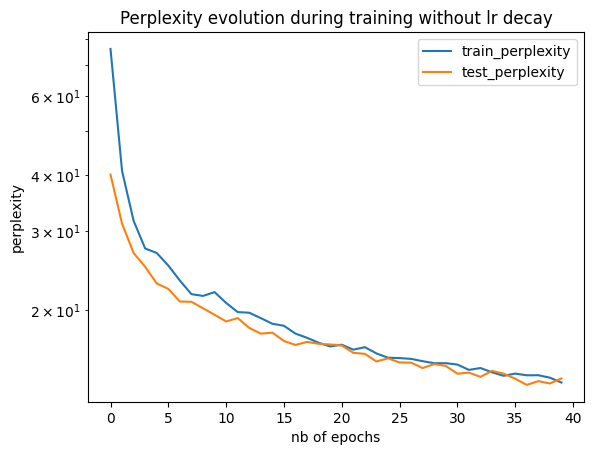

In [5]:
epoch_list = np.arange(0,len(perplexity_train_list))
plt.plot(epoch_list,perplexity_train_list)
plt.plot(epoch_list,perplexity_test_list)
plt.yscale("log")
plt.title('Perplexity evolution during training without lr decay')
plt.legend(['train_perplexity','test_perplexity'])
plt.xlabel('nb of epochs')
plt.ylabel('perplexity')

Text(0, 0.5, 'cross entropy loss')

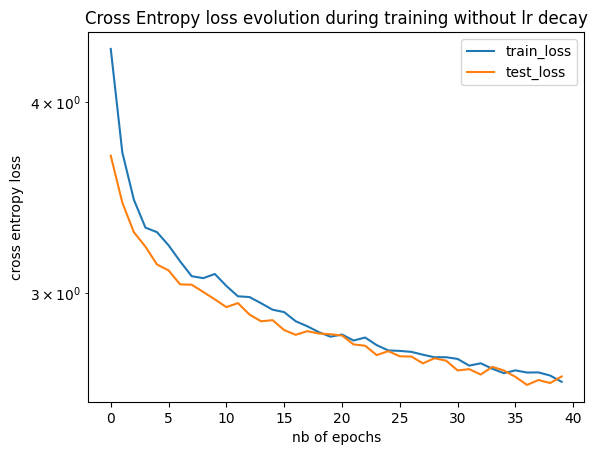

In [6]:
epoch_list = np.arange(0,len(train_loss_list))
plt.plot(epoch_list,train_loss_list)
plt.plot(epoch_list,test_loss_list)
plt.yscale("log")
plt.title('Cross Entropy loss evolution during training without lr decay')
plt.legend(['train_loss','test_loss'])
plt.xlabel('nb of epochs')
plt.ylabel('cross entropy loss')



In [11]:
nb_char = 3000

seed = "I saw a dumb cat holding an apple on its head, "
input_idx = util.encode(seed,stoi)

input_idx = torch.tensor(input_idx,dtype=torch.long)
input_idx = torch.unsqueeze(input_idx, 0).to(device)


In [12]:
m.eval()
with torch.no_grad():
    out = m.generate(nb_char,input_idx,'sample')
    out = util.decode(out,itos)
    
print(out)
util.save_generated_text('output'+str(nb_epoch)+'_epochs_sample_no_lr_d.txt',out)

I saw a dumb cat holding an apple on its head, fos than thas yZ ad:

Tho matr opans?hak thes$Wife bill, the.
V
H'd tifonghounde d ont kedare of;
Hees hemeda te'eelof, atEAnolloft of th 'seoredin a de hENaras sherurethelWhe tl lerinyoushZ?Yyofweatallyoushericent wich pin nt we.
IEe's.
Cf-RII:
toomy:
HA' is che ard,

BesK&ourd g:
The fr thrtEenkELAn thiLI, akeanyoowhes ghrf beet.

NoMESare.
Tof theel o:
Thowortid wiun sur my ?
Thomak'thealrofeous  ;
Wh makiqtomus.
Arithad th'sesens win thathesss mares LN:
Theithoreng arkSind s s I yog for t A
I de hatomyorit I, o, whed hiofotan y whe?
ThwoFCeathes as ave mer h, haveQ theveliritI
AatAisfesE;
N KhishiDI yof imes chit hour he sour, I bawig, she thillid I s idichef gealeake!
WYor atore mINolayearunghaveveshenghekhethis.
Thon min win IthenYouy tte
Thasuerer s te ay ind f siy buOuleind amaked,
NNhout!

Ar :
An t bend
, of ckincorqnus maourint lZthath herdsthe bis bexke a.

The my lo winveg bu se th B the areE&eanealykemealickerdeyoresatiseedar

In [14]:
m.eval()
with torch.no_grad():
    out = m.generate(nb_char,input_idx,'high_prob')
    out = util.decode(out,itos)
print(out)

util.save_generated_text('output'+str(nb_epoch)+'epochs_high_prob_no_lr_d.txt',out)




I saw a dumb cat holding an apple on its head, the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the t